# Image Classification with CNNs using Keras

In [2]:
import tensorflow as tf
import os
import numpy as np
from birddata import x_train,y_train,x_test,y_test,categories

from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')
    
print('TensorFlow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())


TensorFlow version: 2.1.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is using GPU? False


In [3]:

#x_train, y_train = get_three_classes(x_train, y_train)
#x_test, y_test = get_three_classes(x_test, y_test)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(16913, 64, 64, 3) (16913, 10)
(100, 64, 64, 3) (100, 10)


(16913, 10)


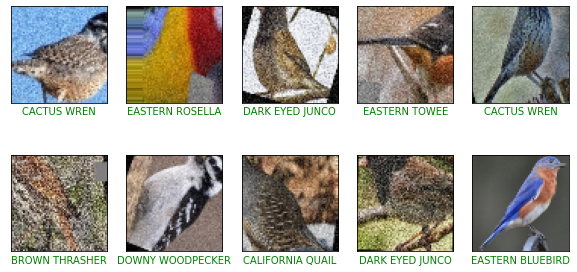

In [4]:
class_names = []
for i in categories:
    class_names.append(i)

def show_random_examples(x, y, p):
    indices = np.random.choice(range(x.shape[0]), 10, replace=False)
    print(y.shape)
    x = x[indices]
    y = y[indices]
    p = p[indices]
    
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
        plt.xlabel(class_names[np.argmax(p[i])], color=col)
    plt.show()

show_random_examples(x_train, y_train, y_train)

(100, 10)


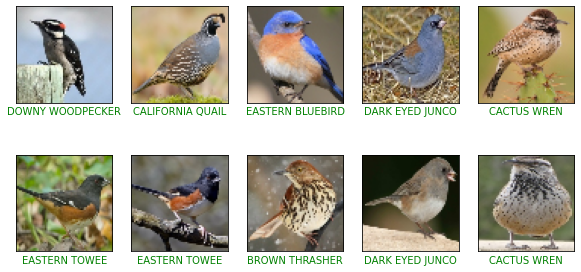

In [5]:
show_random_examples(x_test, y_test, y_test)

In [1]:
"""from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense
mnet = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top=False, input_shape=(96, 96, 3),
                                                     pooling='avg', weights='imagenet')
mnet.summary()
"""


"from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization\nfrom tensorflow.keras.layers import Dropout, Flatten, Input, Dense\nmnet = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top=False, input_shape=(96, 96, 3),\n                                                     pooling='avg', weights='imagenet')\nmnet.summary()\n"

In [6]:
"""
def create_model():
    model = tf.keras.models.Sequential([
        mnet,
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(50, activation='softmax')
    ])

    model.layers[0].trainable = False
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()
model.summary()
"""

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_96 (Model)  (None, 1280)              2257984   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 50)                64050     
Total params: 2,322,034
Trainable params: 64,050
Non-trainable params: 2,257,984
_________________________________________________________________


In [7]:
"""
%%time

h = model.fit(
    x_train/255., y_train,
    validation_data=(x_test/255., y_test),
    epochs=1, batch_size=64,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
        #tf.keras.callbacks.ModelCheckpoint('model/model_{val_accuracy:.3f}.h5', save_best_only=True,
                                          #save_weights_only=False, monitor='val_accuracy')
    ]
)
"""


Train on 19731 samples, validate on 275 samples
19731/19731 [==============================] - 1093s 55ms/sample - loss: 2.5754 - accuracy: 0.3636 - val_loss: 0.9635 - val_accuracy: 0.7055
Wall time: 27min 23s


In [6]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

def create_model():
    
    def add_conv_block(model, num_filters):
        
        model.add(Conv2D(num_filters, 3, activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(Conv2D(num_filters, 3, activation='relu', padding='valid'))
        model.add(MaxPooling2D(pool_size=2))
        model.add(Dropout(0.2))

        return model
    
    model = tf.keras.models.Sequential()
    model.add(Input(shape=(64, 64, 3)))
    
    model = add_conv_block(model, 32)
    model = add_conv_block(model, 64)
    model = add_conv_block(model, 128)
    #model = add_conv_block(model, 128)

    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 31, 64)        2

In [7]:
%%time

h = model.fit(
    x_train/255., y_train,
    validation_data=(x_test/255., y_test),
    epochs=10, batch_size=128,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
        #tf.keras.callbacks.ModelCheckpoint('model/model_{val_accuracy:.3f}.h5', save_best_only=True,
                                          #save_weights_only=False, monitor='val_accuracy')
    ]
)

Train on 16913 samples, validate on 100 samples
Epoch 1/10
16913/16913 [==============================] - 573s 34ms/sample - loss: 1.6170 - accuracy: 0.5106 - val_loss: 2.5810 - val_accuracy: 0.1100
Epoch 2/10
16913/16913 [==============================] - 540s 32ms/sample - loss: 0.8664 - accuracy: 0.7113 - val_loss: 3.1235 - val_accuracy: 0.1500
Epoch 3/10
16913/16913 [==============================] - 454s 27ms/sample - loss: 0.6525 - accuracy: 0.7809 - val_loss: 1.8678 - val_accuracy: 0.4600
Epoch 4/10
16913/16913 [==============================] - 390s 23ms/sample - loss: 0.4909 - accuracy: 0.8365 - val_loss: 0.9618 - val_accuracy: 0.7400
Epoch 5/10
16913/16913 [==============================] - 410s 24ms/sample - loss: 0.3989 - accuracy: 0.8666 - val_loss: 0.9004 - val_accuracy: 0.7700
Epoch 6/10
16913/16913 [==============================] - 387s 23ms/sample - loss: 0.3263 - accuracy: 0.8901 - val_loss: 0.7419 - val_accuracy: 0.7500
Epoch 7/10
16913/16913 [======================

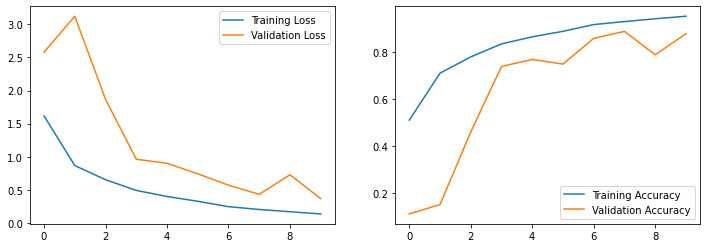

In [8]:
losses = h.history['loss']
accs = h.history['accuracy']
val_losses = h.history['val_loss']
val_accs = h.history['val_accuracy']
epochs = len(losses)

plt.figure(figsize=(12, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

In [9]:
#model = tf.keras.models.load_model('models/model_0.898.h5')
preds = model.predict(x_test/255.)

(100, 10)


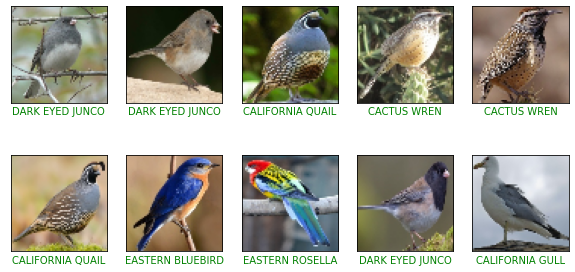

In [10]:
show_random_examples(x_test, y_test, preds)

In [14]:
model.save("birdmodel.h5")

In [ ]:
#model =  tf.keras.models.load_model('birdmodel1.h5')

In [ ]:
model.summary()